# Import The Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Import The Dataset

In [2]:
data=pd.read_csv("indian_liver_patient_Data.csv")
data

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...
578,60,Male,0.5,0.1,500,20,34,5.9,1.6,0.37,2
579,40,Male,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,Male,1.3,0.5,184,29,32,6.8,3.4,1.00,1


# Taking Care Of Missing Data

In [3]:
data.isnull().any()

Age                           False
Gender                        False
Total_Bilirubin               False
Direct_Bilirubin              False
Alkaline_Phosphotase          False
Alamine_Aminotransferase      False
Aspartate_Aminotransferase    False
Total_Protiens                False
Albumin                       False
Albumin_and_Globulin_Ratio     True
Dataset                       False
dtype: bool

In [4]:
data.columns

Index(['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
       'Albumin_and_Globulin_Ratio', 'Dataset'],
      dtype='object')

In [5]:
data['Dataset'].value_counts()

1    416
2    167
Name: Dataset, dtype: int64

In [6]:
data['Albumin_and_Globulin_Ratio'].fillna((data['Albumin_and_Globulin_Ratio'].median()),inplace=True)

In [7]:
data.isnull().any()

Age                           False
Gender                        False
Total_Bilirubin               False
Direct_Bilirubin              False
Alkaline_Phosphotase          False
Alamine_Aminotransferase      False
Aspartate_Aminotransferase    False
Total_Protiens                False
Albumin                       False
Albumin_and_Globulin_Ratio    False
Dataset                       False
dtype: bool

In [8]:
a=data.corr()
a

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
Age,1.000000,0.011763,0.007529,0.080425,-0.086883,-0.019910,-0.187461,-0.265924,-0.215968,-0.137351
Total_Bilirubin,0.011763,1.000000,0.874618,0.206669,0.214065,0.237831,-0.008099,-0.222250,-0.206015,-0.220208
Direct_Bilirubin,0.007529,0.874618,1.000000,0.234939,0.233894,0.257544,-0.000139,-0.228531,-0.199850,-0.246046
Alkaline_Phosphotase,0.080425,0.206669,0.234939,1.000000,0.125680,0.167196,-0.028514,-0.165453,-0.233784,-0.184866
Alamine_Aminotransferase,-0.086883,0.214065,0.233894,0.125680,1.000000,0.791966,-0.042518,-0.029742,-0.002254,-0.163416
Aspartate_Aminotransferase,-0.019910,0.237831,0.257544,0.167196,0.791966,1.000000,-0.025645,-0.085290,-0.069930,-0.151934
Total_Protiens,-0.187461,-0.008099,-0.000139,-0.028514,-0.042518,-0.025645,1.000000,0.784053,0.233828,0.035008
Albumin,-0.265924,-0.222250,-0.228531,-0.165453,-0.029742,-0.085290,0.784053,1.000000,0.686091,0.161388
Albumin_and_Globulin_Ratio,-0.215968,-0.206015,-0.199850,-0.233784,-0.002254,-0.069930,0.233828,0.686091,1.000000,0.162144
Dataset,-0.137351,-0.220208,-0.246046,-0.184866,-0.163416,-0.151934,0.035008,0.161388,0.162144,1.000000


# Data Visualization

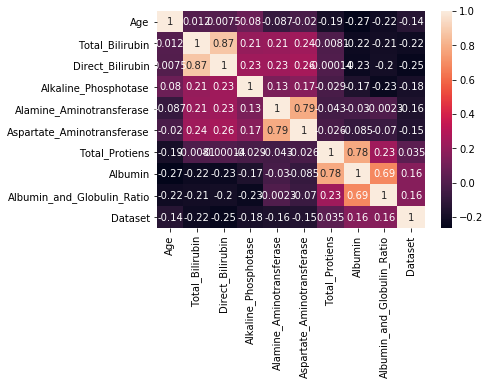

In [9]:
import seaborn as sns
sns.heatmap(data.corr(),annot=True)

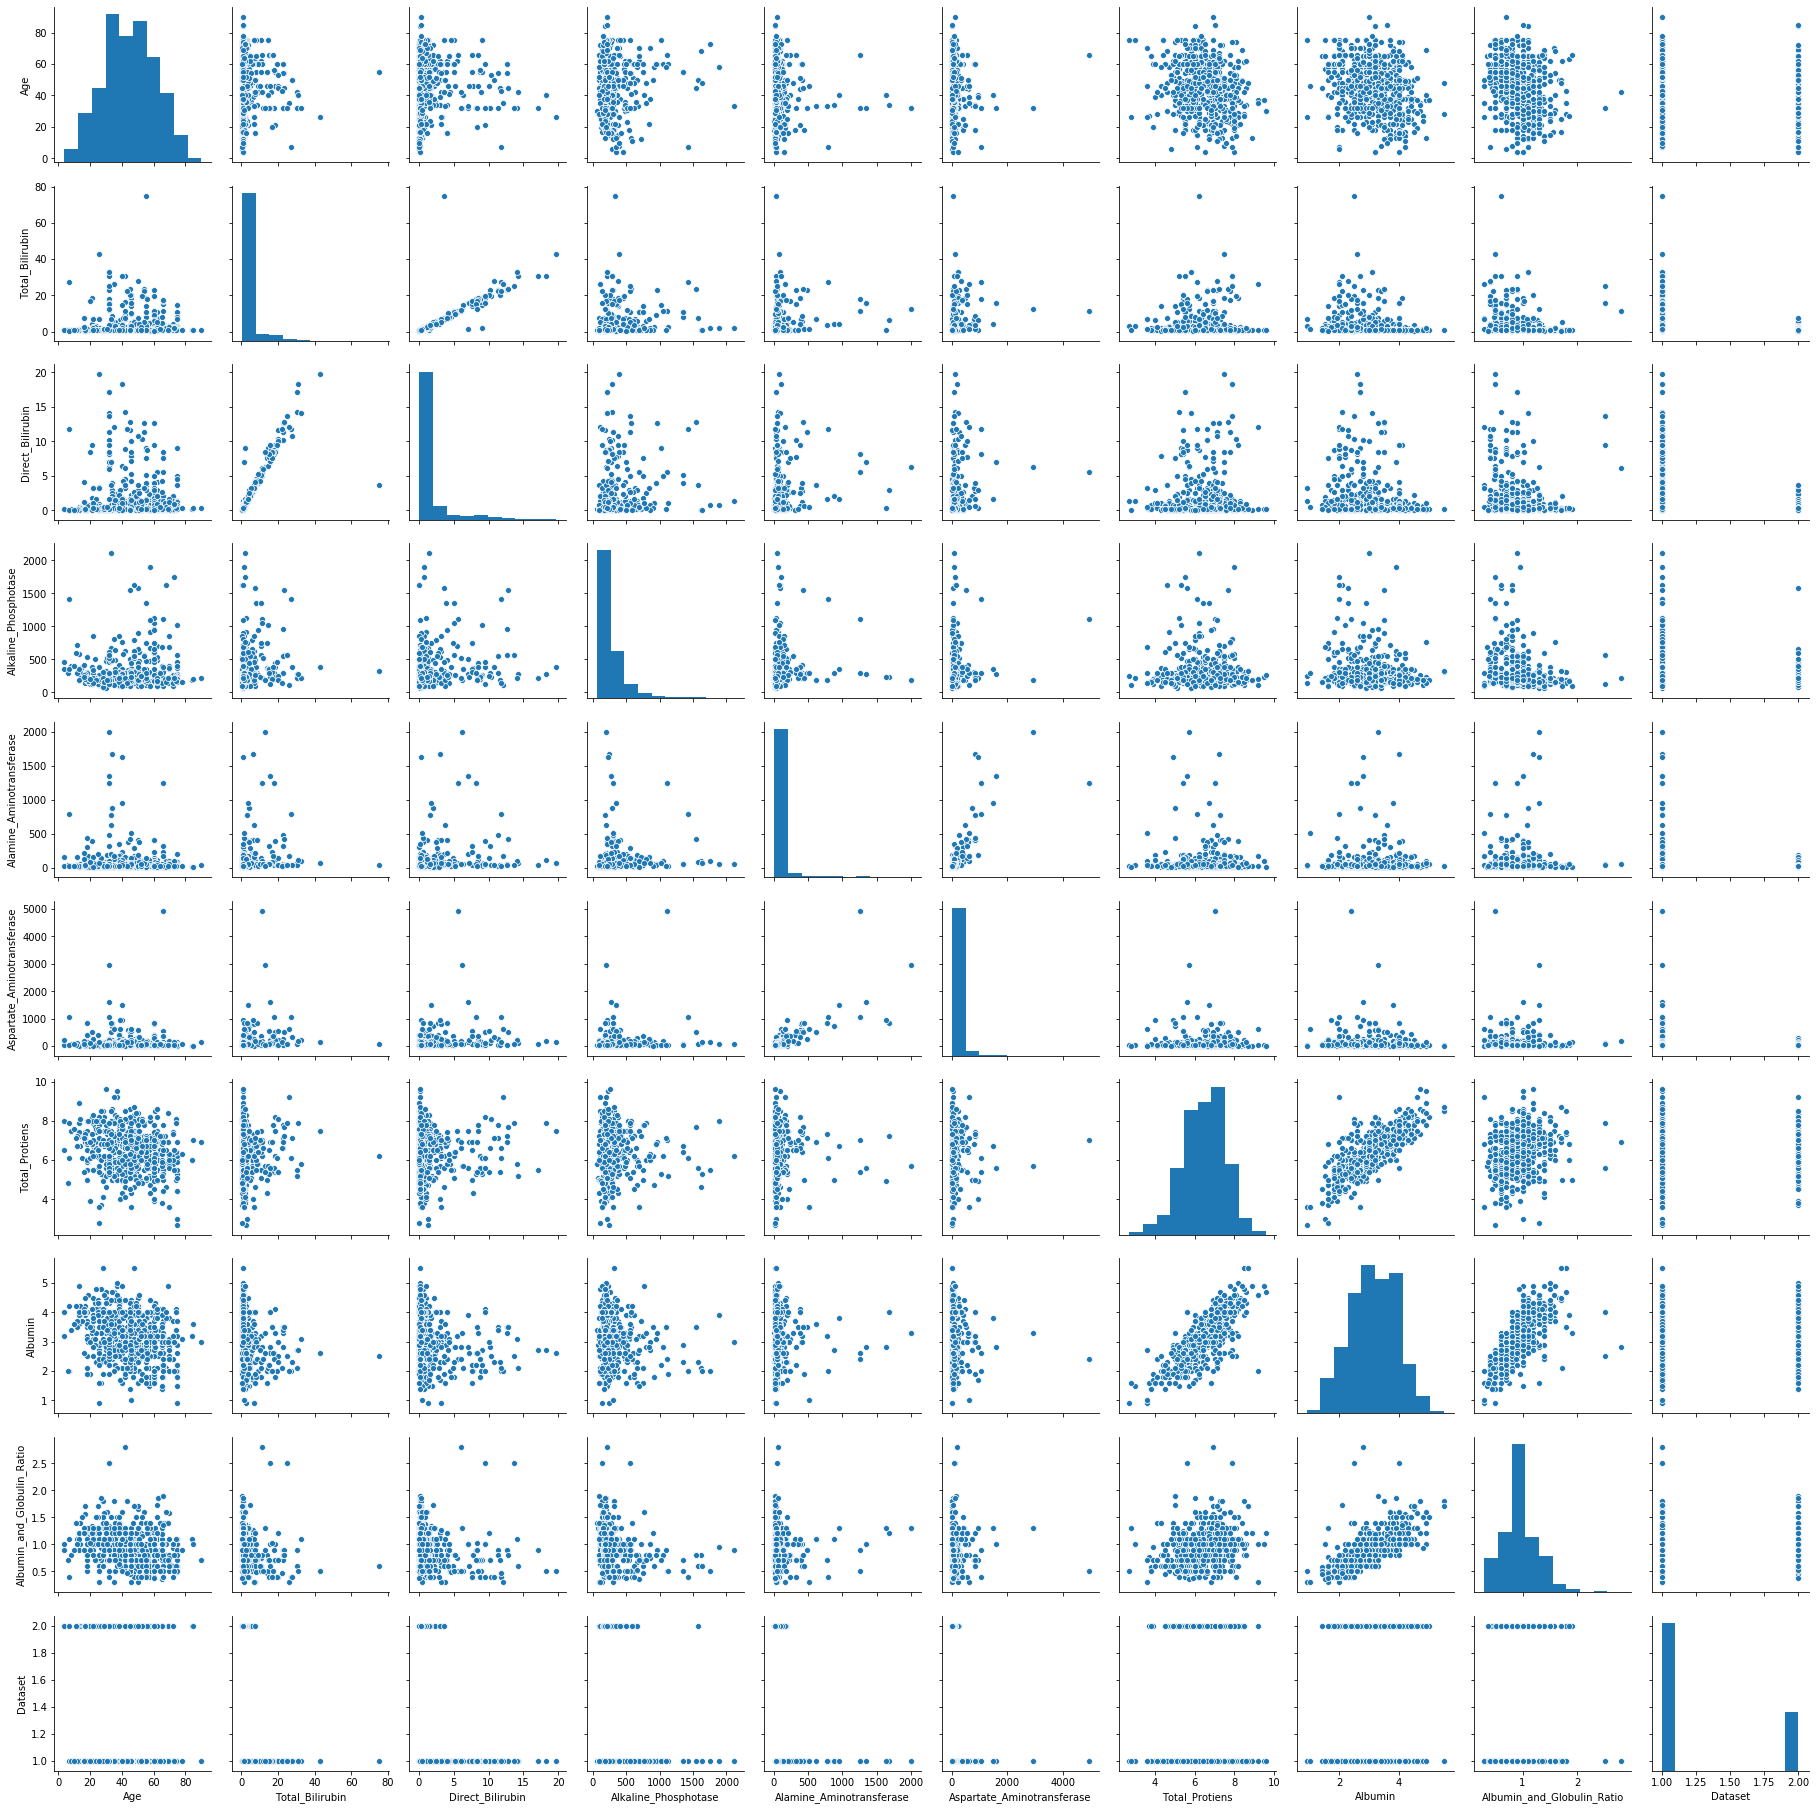

In [10]:
sns.pairplot(data)


In [11]:
sampled1=data[data['Dataset']==1].values
sampled1

array([[65, 'Female', 0.7, ..., 3.3, 0.9, 1],
       [62, 'Male', 10.9, ..., 3.2, 0.74, 1],
       [62, 'Male', 7.3, ..., 3.3, 0.89, 1],
       ...,
       [40, 'Male', 0.6, ..., 3.2, 1.1, 1],
       [52, 'Male', 0.8, ..., 3.2, 1.0, 1],
       [31, 'Male', 1.3, ..., 3.4, 1.0, 1]], dtype=object)

In [12]:
sampled2=data[data['Dataset']==2].values
sampled2

array([[17, 'Male', 0.9, ..., 4.1, 1.2, 2],
       [64, 'Male', 0.9, ..., 3.4, 0.9, 2],
       [25, 'Male', 0.6, ..., 2.3, 0.7, 2],
       ...,
       [50, 'Female', 1.0, ..., 4.0, 1.0, 2],
       [60, 'Male', 0.5, ..., 1.6, 0.37, 2],
       [38, 'Male', 1.0, ..., 4.4, 1.5, 2]], dtype=object)

Text(0.5, 1.0, 'Total_Bilirubin (liver VS non Liver')

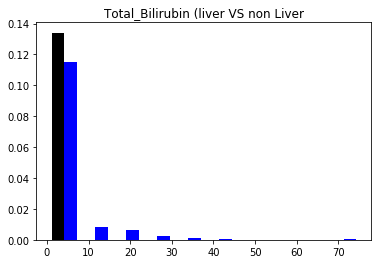

In [13]:
plt.hist((sampled2[:,2],sampled1[:,2]),density=True,histtype='bar',color=['black','blue'],label=['black','blue'])
plt.title('Total_Bilirubin (liver VS non Liver')

Text(0.5, 1.0, 'Direct_Bilirubin (liver VS non Liver)')

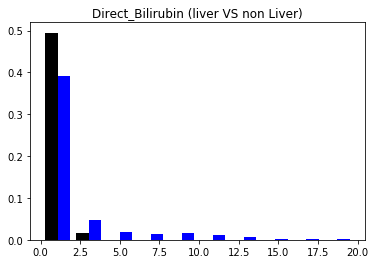

In [14]:
plt.hist((sampled2[:,3],sampled1[:,3]),density=True,histtype='bar',color=['black','blue'],label=['black','blue'])
plt.title('Direct_Bilirubin (liver VS non Liver)')

Text(0.5, 1.0, 'Alkaline_Phosphotase (liver VS non Liver)')

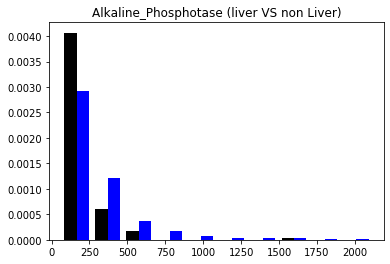

In [15]:
plt.hist((sampled2[:,4],sampled1[:,4]),density=True,histtype='bar',color=['black','blue'],label=['black','blue'])
plt.title('Alkaline_Phosphotase (liver VS non Liver)')

Text(0.5, 1.0, 'Alamine_Aminotransferase (liver VS non Liver)')

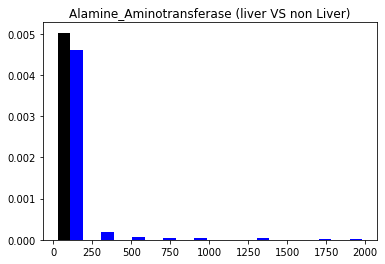

In [16]:
plt.hist((sampled2[:,5],sampled1[:,5]),density=True,histtype='bar',color=['black','blue'],label=['black','blue'])
plt.title('Alamine_Aminotransferase (liver VS non Liver)')

Text(0.5, 1.0, 'Aspartate_Aminotransferase (liver VS non Liver)')

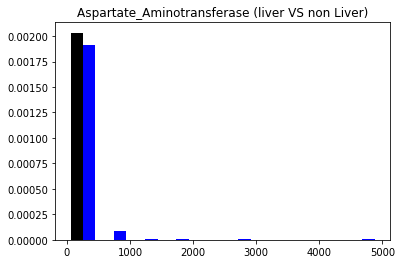

In [17]:
plt.hist((sampled2[:,6],sampled1[:,6]),density=True,histtype='bar',color=['black','blue'],label=['black','blue'])
plt.title('Aspartate_Aminotransferase (liver VS non Liver)')

Text(0.5, 1.0, 'Total_Protiens (liver VS non Liver)')

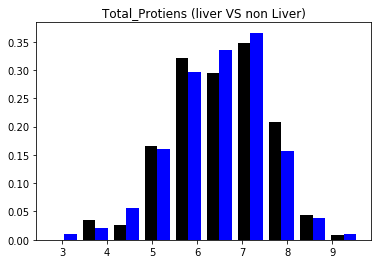

In [18]:
plt.hist((sampled2[:,7],sampled1[:,7]),density=True,histtype='bar',color=['black','blue'],label=['black','blue'])
plt.title('Total_Protiens (liver VS non Liver)')

Text(0.5, 1.0, 'Albumin (liver VS non Liver)')

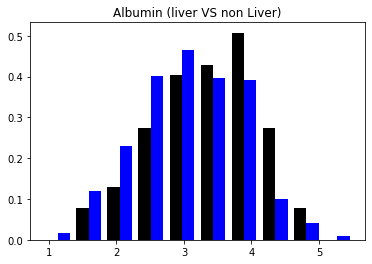

In [19]:
plt.hist((sampled2[:,8],sampled1[:,8]),density=True,histtype='bar',color=['black','blue'],label=['black','blue'])
plt.title('Albumin (liver VS non Liver)')

Text(0.5, 1.0, 'Albumin_and_Globulin_Ratio (liver VS non Liver)')

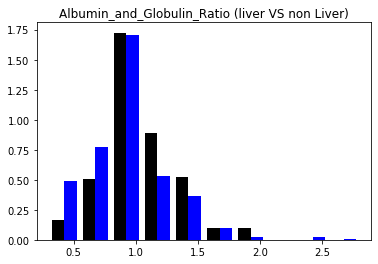

In [20]:
plt.hist((sampled2[:,9],sampled1[:,9]),density=True,histtype='bar',color=['black','blue'],label=['black','blue'])
plt.title('Albumin_and_Globulin_Ratio (liver VS non Liver)')

Text(0.5, 1, 'Correlation between features')

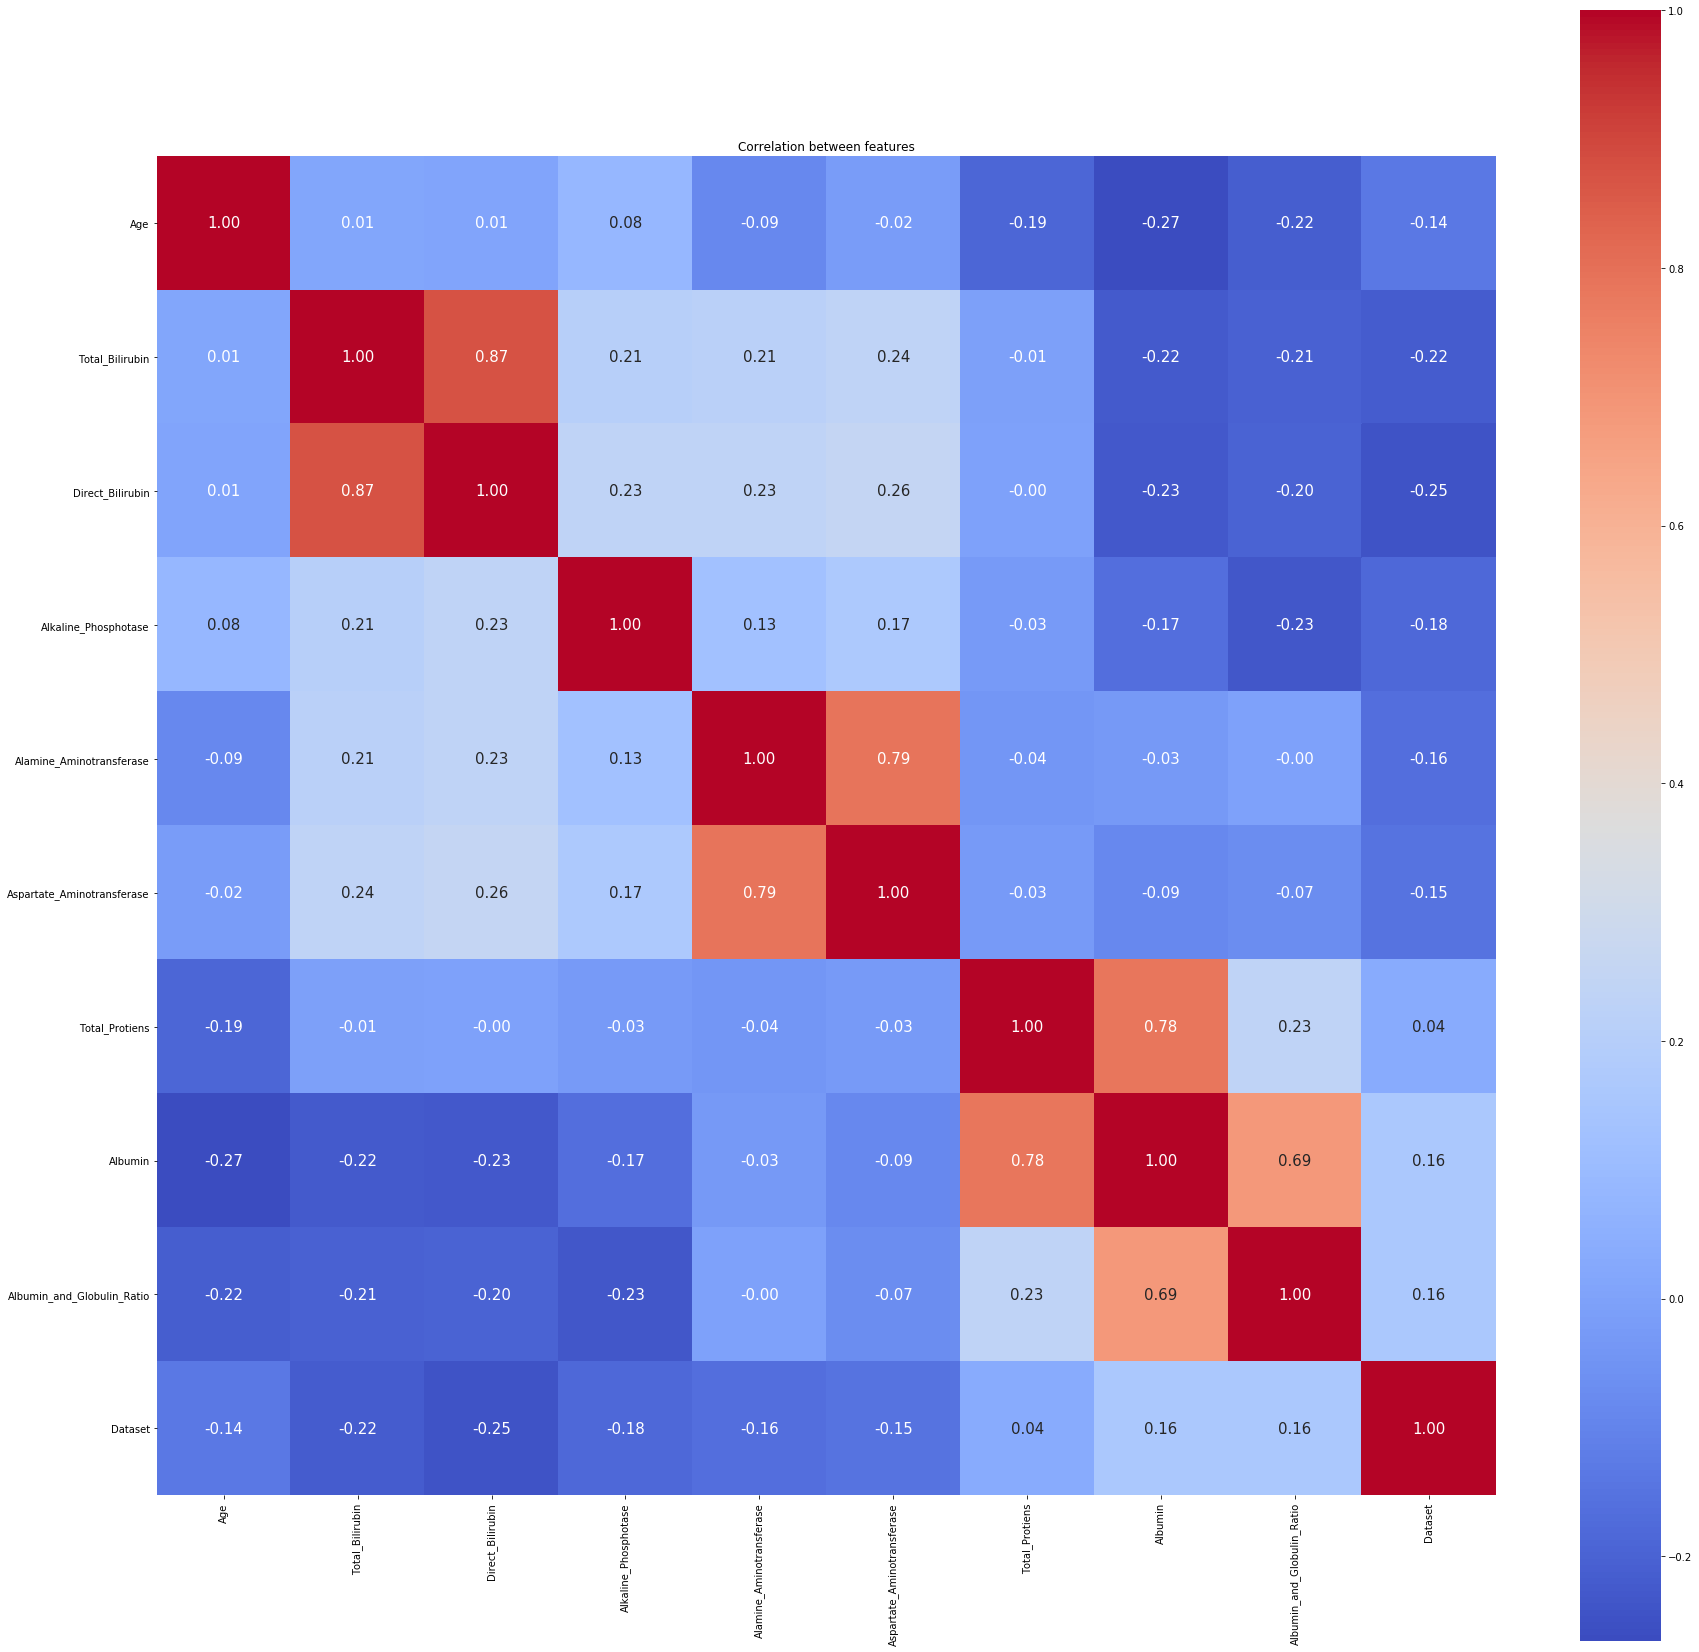

In [21]:
plt.figure(figsize=(30,30))
sns.heatmap(a,cbar=True,square=True,annot=True,fmt='.2f',annot_kws={'size':15},cmap='coolwarm')
plt.title('Correlation between features')

In [22]:
data['Dataset'].value_counts()

1    416
2    167
Name: Dataset, dtype: int64

According to the Description dataset one is liver disease patient and dataset two is for non liver disease patient 

# Splitting Dataset in to Independent variable and Dependent variable

In [23]:
x=data.iloc[:,0:10].values
x

array([[65, 'Female', 0.7, ..., 6.8, 3.3, 0.9],
       [62, 'Male', 10.9, ..., 7.5, 3.2, 0.74],
       [62, 'Male', 7.3, ..., 7.0, 3.3, 0.89],
       ...,
       [52, 'Male', 0.8, ..., 6.4, 3.2, 1.0],
       [31, 'Male', 1.3, ..., 6.8, 3.4, 1.0],
       [38, 'Male', 1.0, ..., 7.3, 4.4, 1.5]], dtype=object)

In [24]:
y=data.iloc[:,10].values
y

array([1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 1, 1,
       1, 1, 2, 1, 1, 1, 2, 2, 1, 1, 2, 2, 2, 1, 2, 1, 1, 1, 1, 2, 2, 1,
       2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 2, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2,
       2, 1, 2, 1, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 1, 1, 1, 1, 1, 2,
       2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 2,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 2, 1, 1, 1,
       2, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 2, 1, 2, 1,
       1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1,
       2, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 2, 1, 1,
       1, 2, 1, 1, 1, 2, 1, 2, 1, 1, 1, 2, 1, 2, 2,

In [25]:
x.shape

(583, 10)

In [26]:
x

array([[65, 'Female', 0.7, ..., 6.8, 3.3, 0.9],
       [62, 'Male', 10.9, ..., 7.5, 3.2, 0.74],
       [62, 'Male', 7.3, ..., 7.0, 3.3, 0.89],
       ...,
       [52, 'Male', 0.8, ..., 6.4, 3.2, 1.0],
       [31, 'Male', 1.3, ..., 6.8, 3.4, 1.0],
       [38, 'Male', 1.0, ..., 7.3, 4.4, 1.5]], dtype=object)

In [27]:
x[1,:]

array([62, 'Male', 10.9, 5.5, 699, 64, 100, 7.5, 3.2, 0.74], dtype=object)

# Label Encoding

In [28]:
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()

In [29]:
x[:,1]=lb.fit_transform(x[:,1])
x

array([[65, 0, 0.7, ..., 6.8, 3.3, 0.9],
       [62, 1, 10.9, ..., 7.5, 3.2, 0.74],
       [62, 1, 7.3, ..., 7.0, 3.3, 0.89],
       ...,
       [52, 1, 0.8, ..., 6.4, 3.2, 1.0],
       [31, 1, 1.3, ..., 6.8, 3.4, 1.0],
       [38, 1, 1.0, ..., 7.3, 4.4, 1.5]], dtype=object)

Female-0
male-1

In [30]:
y

array([1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 1, 1,
       1, 1, 2, 1, 1, 1, 2, 2, 1, 1, 2, 2, 2, 1, 2, 1, 1, 1, 1, 2, 2, 1,
       2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 2, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2,
       2, 1, 2, 1, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 1, 1, 1, 1, 1, 2,
       2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 2,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 2, 1, 1, 1,
       2, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 2, 1, 2, 1,
       1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1,
       2, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 2, 1, 1,
       1, 2, 1, 1, 1, 2, 1, 2, 1, 1, 1, 2, 1, 2, 2,

In [31]:
y=lb.fit_transform(y)
y

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1,

zero liver disease


one non liver disease

# Splitting Data Into Train And Test

In [32]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=0)

In [33]:
xtrain

array([[4, 1, 0.8, ..., 6.5, 3.2, 0.9],
       [38, 1, 3.7, ..., 7.8, 4.5, 1.3],
       [45, 1, 0.6, ..., 5.8, 2.9, 1.0],
       ...,
       [69, 0, 0.8, ..., 8.4, 4.9, 1.4],
       [60, 1, 2.3, ..., 6.6, 3.5, 1.1],
       [26, 1, 42.8, ..., 7.5, 2.6, 0.5]], dtype=object)

In [34]:
xtest

array([[55, 1, 1.8, ..., 6.1, 2.7, 0.7],
       [60, 1, 8.6, ..., 7.4, 3.0, 0.6],
       [38, 1, 2.7, ..., 7.5, 4.2, 1.2],
       ...,
       [40, 0, 0.9, ..., 6.8, 3.1, 0.8],
       [31, 1, 0.9, ..., 5.3, 2.3, 0.7],
       [45, 1, 0.8, ..., 6.3, 3.2, 1.0]], dtype=object)

In [35]:
ytrain

array([1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1,

In [36]:
ytest

array([0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1],
      dtype=int64)

# KNN

In [37]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler#Feature scaling
from sklearn.pipeline import Pipeline # Pipeline
pipe = Pipeline([('rescale', StandardScaler()),('classifier', KNeighborsClassifier())])
pipe.fit(xtrain,ytrain)


Pipeline(memory=None,
         steps=[('rescale',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('classifier',
                 KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                      metric='minkowski', metric_params=None,
                                      n_jobs=None, n_neighbors=5, p=2,
                                      weights='uniform'))],
         verbose=False)

In [38]:
ypknn=pipe.predict(xtest)
ypknn

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1],
      dtype=int64)

In [39]:
from sklearn.metrics import accuracy_score
knn=accuracy_score(ytest,ypknn)
knn

0.6285714285714286

Accuracy: 
 0.6285714285714286
[[97 25]
 [40 13]]
              precision    recall  f1-score   support

           0       0.71      0.80      0.75       122
           1       0.34      0.25      0.29        53

    accuracy                           0.63       175
   macro avg       0.53      0.52      0.52       175
weighted avg       0.60      0.63      0.61       175



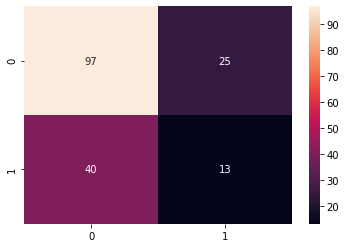

In [40]:
from sklearn.metrics import classification_report,confusion_matrix
print('Accuracy: \n', accuracy_score(ytest,ypknn))
print(confusion_matrix(ytest,ypknn))
print(classification_report(ytest,ypknn))
sns.heatmap(confusion_matrix(ytest,ypknn),annot=True,fmt="d")

# Decision tree

In [48]:
from sklearn.tree import DecisionTreeRegressor
dt= DecisionTreeRegressor(criterion='mse',random_state=0)
dt.fit(xtrain,ytrain)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=0, splitter='best')

In [49]:
ypdec=dt.predict(xtest)
ypdec

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0., 0., 1., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0.,
       0., 0., 1., 0., 0., 1., 1., 1., 0., 1., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 1.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 1., 0.,
       0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0.,
       1., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 1., 1., 0., 0., 0., 1.,
       0., 0., 1., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 1., 0.])

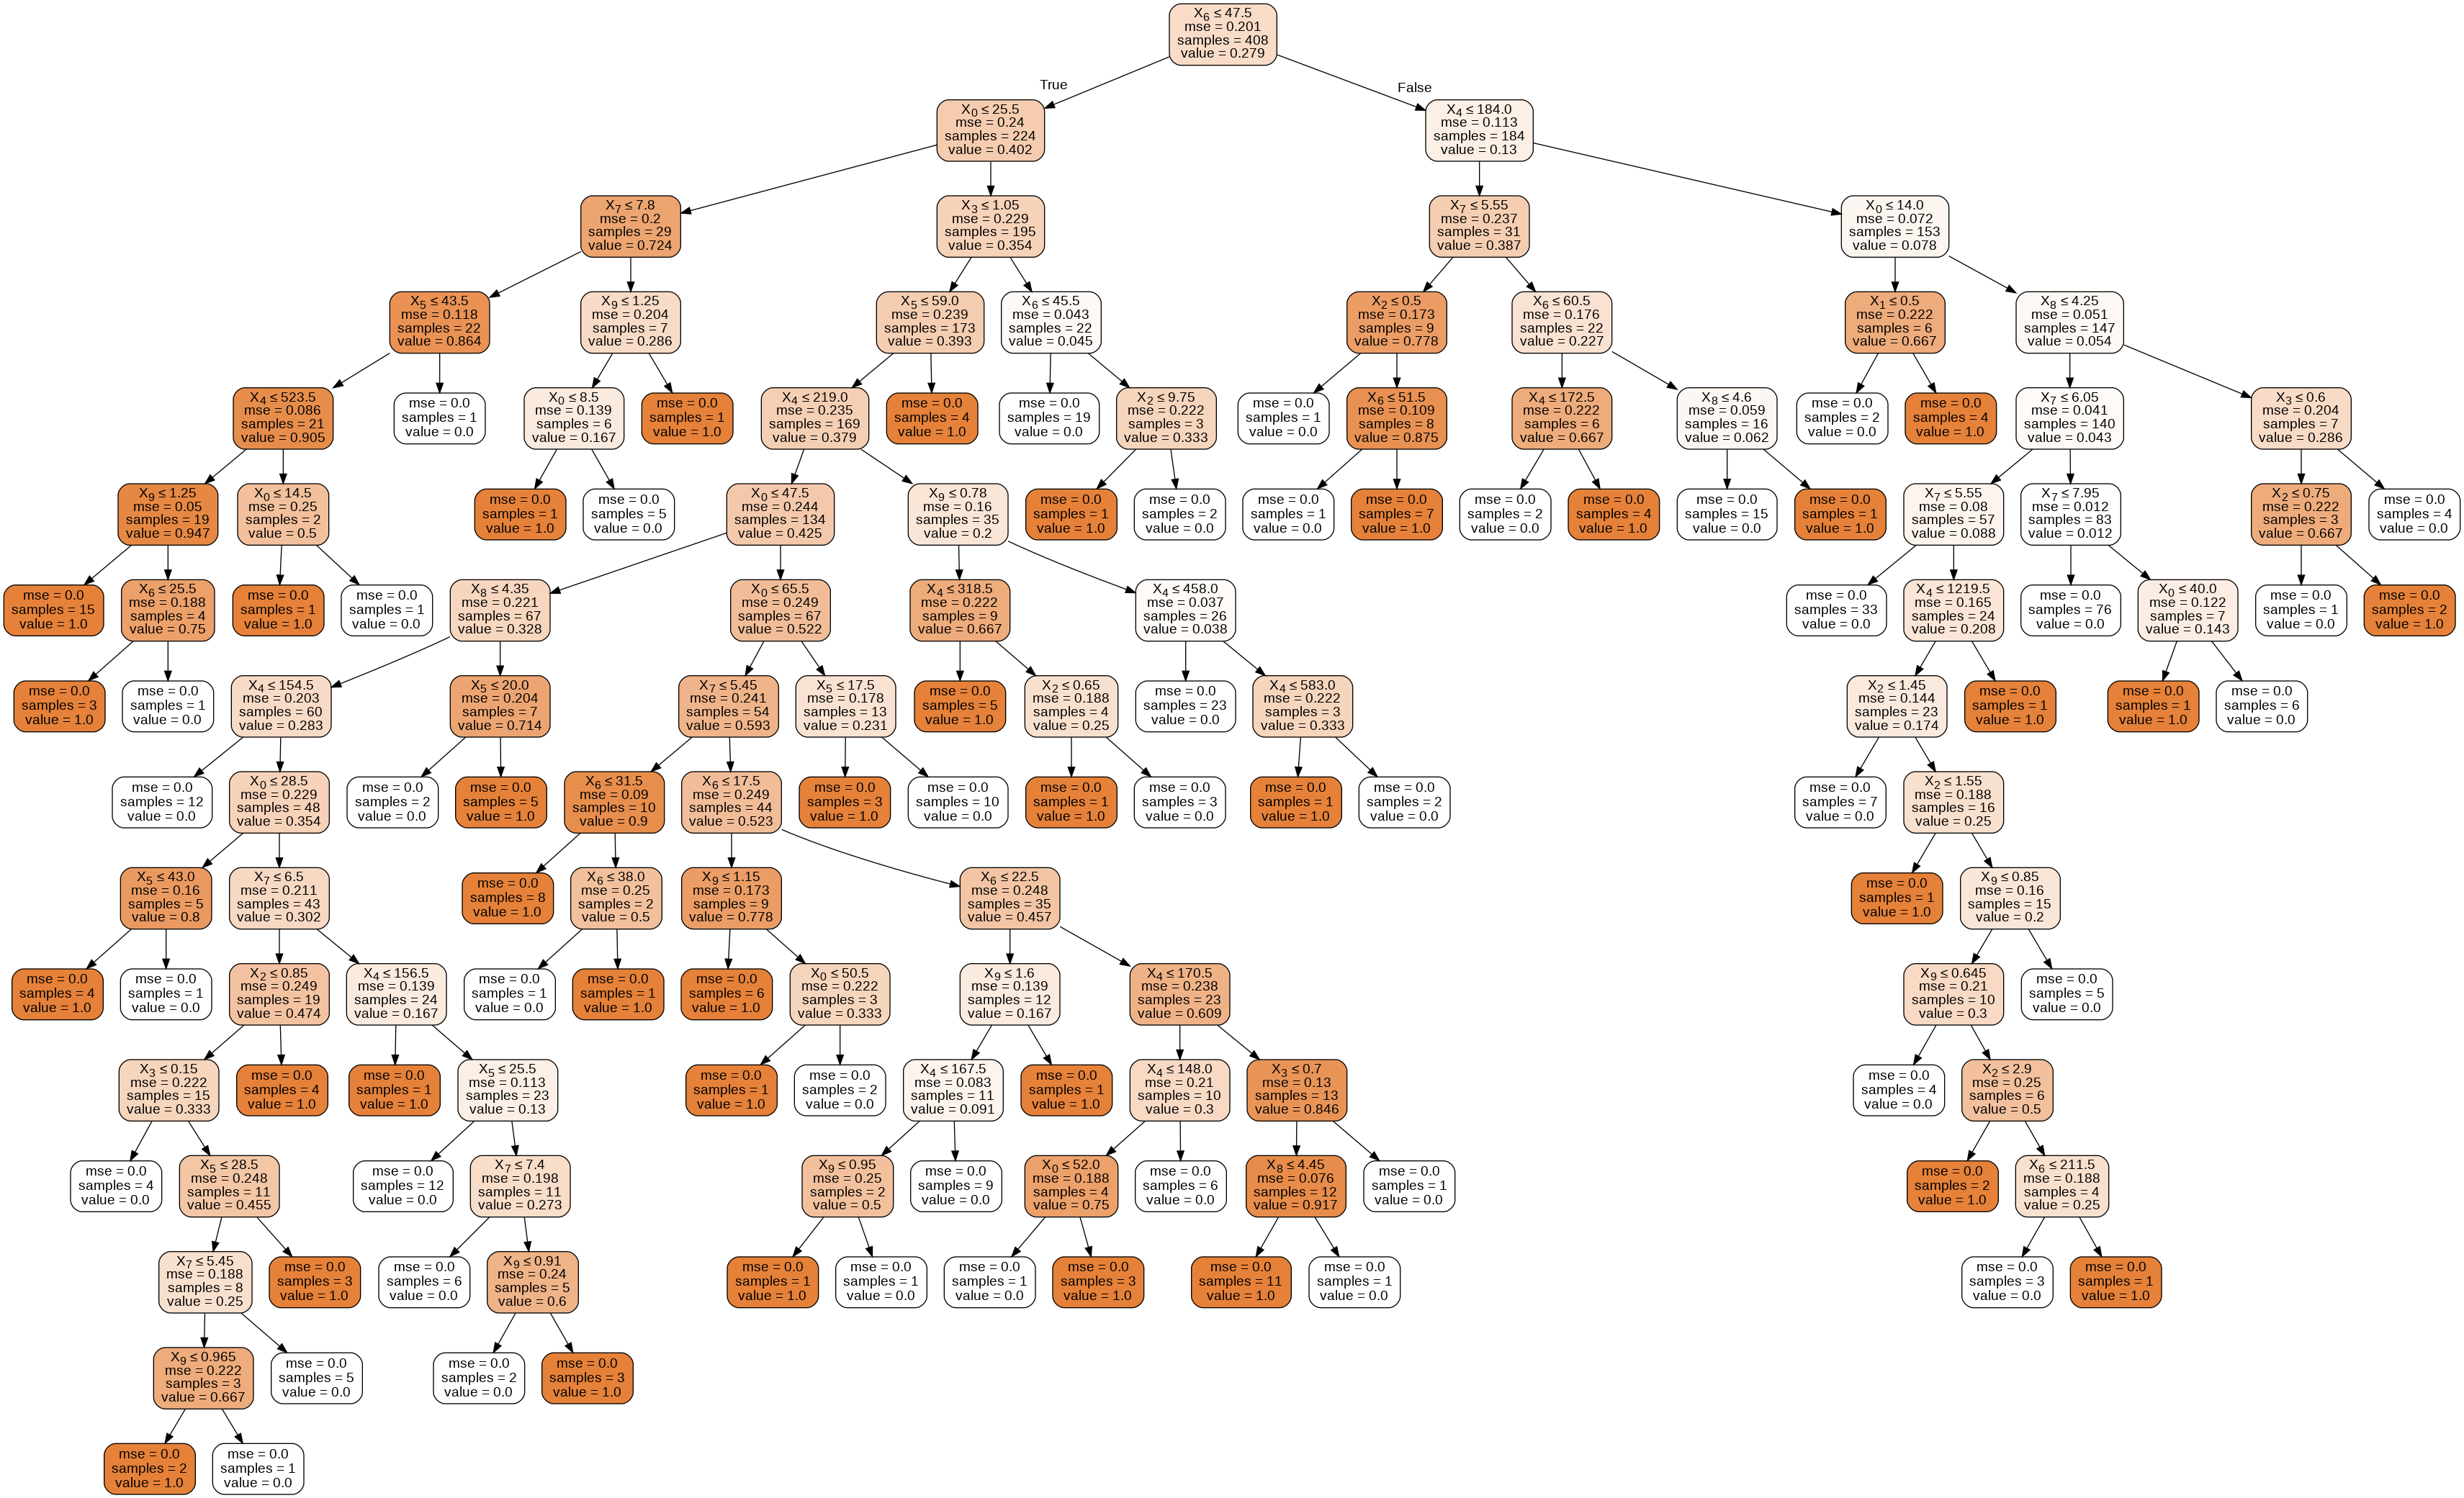

In [0]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(dt, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [50]:
from sklearn.metrics import accuracy_score
Deci=accuracy_score(ytest,ypdec)
Deci

0.64

Accuracy: 
 0.64
[[94 28]
 [35 18]]
              precision    recall  f1-score   support

           0       0.73      0.77      0.75       122
           1       0.39      0.34      0.36        53

    accuracy                           0.64       175
   macro avg       0.56      0.56      0.56       175
weighted avg       0.63      0.64      0.63       175



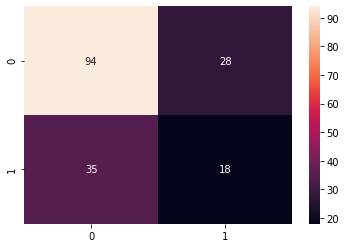

In [51]:
from sklearn.metrics import classification_report,confusion_matrix
print('Accuracy: \n', accuracy_score(ytest,ypdec))
print(confusion_matrix(ytest,ypdec))
print(classification_report(ytest,ypdec))
sns.heatmap(confusion_matrix(ytest,ypdec),annot=True,fmt="d")

# SVC

In [52]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
pipe=Pipeline([
    ('rescale',StandardScaler()),
    ('classifier',SVC(kernel='rbf'))
    
])

In [53]:
pipe.fit(xtrain,ytrain)

Pipeline(memory=None,
         steps=[('rescale',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('classifier',
                 SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None,
                     coef0=0.0, decision_function_shape='ovr', degree=3,
                     gamma='scale', kernel='rbf', max_iter=-1,
                     probability=False, random_state=None, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)

In [54]:
ypsvc=pipe.predict(xtest)
ypsvc

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int64)

In [55]:
from sklearn.metrics import accuracy_score
svc=accuracy_score(ytest,ypsvc)
svc

0.6914285714285714

Accuracy: 
 0.6914285714285714
[[120   2]
 [ 52   1]]
              precision    recall  f1-score   support

           0       0.70      0.98      0.82       122
           1       0.33      0.02      0.04        53

    accuracy                           0.69       175
   macro avg       0.52      0.50      0.43       175
weighted avg       0.59      0.69      0.58       175



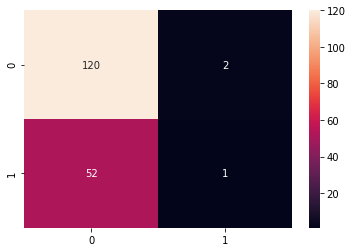

In [56]:
from sklearn.metrics import classification_report,confusion_matrix
print('Accuracy: \n', accuracy_score(ytest,ypsvc))
print(confusion_matrix(ytest,ypsvc))
print(classification_report(ytest,ypsvc))
sns.heatmap(confusion_matrix(ytest,ypsvc),annot=True,fmt="d")

# Naive Bayes

In [57]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(xtrain,ytrain)

C:\Users\Partha\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [58]:
from joblib import dump
dump(lr,'navieliver.save')

['navieliver.save']

In [59]:
ypnb=lr.predict(xtest)
ypnb

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int64)

In [60]:
from sklearn.metrics import accuracy_score
nb=accuracy_score(ytest,ypnb)
nb

0.6971428571428572

Accuracy: 
 0.6971428571428572
[[115   7]
 [ 46   7]]
              precision    recall  f1-score   support

           0       0.71      0.94      0.81       122
           1       0.50      0.13      0.21        53

    accuracy                           0.70       175
   macro avg       0.61      0.54      0.51       175
weighted avg       0.65      0.70      0.63       175



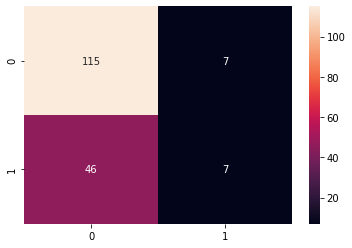

In [61]:
from sklearn.metrics import classification_report,confusion_matrix
print('Accuracy: \n', accuracy_score(ytest,ypnb))
print(confusion_matrix(ytest,ypnb))
print(classification_report(ytest,ypnb))
sns.heatmap(confusion_matrix(ytest,ypnb),annot=True,fmt="d")

# ANN


In [41]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
x_train=sc.fit_transform(xtrain)
x_test= sc.transform(xtest)

In [42]:
import keras
from keras.models import Sequential 
from keras.layers import Dense 

Using TensorFlow backend.


In [43]:
model= Sequential()

In [44]:
x_train.shape

(408, 10)

In [45]:
#inputlayer+hidden layer 1
model.add(Dense(input_dim=10,init="random_uniform",output_dim=10,activation='relu'))

C:\Users\Partha\anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(input_dim=10, activation="relu", units=10, kernel_initializer="random_uniform")`
  


In [46]:
model.add(Dense(output_dim=8,init="random_uniform",activation='relu'))#hidden layer 2

C:\Users\Partha\anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=8, kernel_initializer="random_uniform")`
  """Entry point for launching an IPython kernel.


In [47]:
#output layer
model.add(Dense(output_dim=1,activation='sigmoid',init="random_uniform"))

C:\Users\Partha\anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="random_uniform")`
  


In [48]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 88        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 9         
Total params: 207
Trainable params: 207
Non-trainable params: 0
_________________________________________________________________


In [49]:
model.compile(optimizer="adam",loss="binary_crossentropy",metrics=['accuracy'])

In [50]:
model.fit(x_train,ytrain,epochs=200,batch_size=32)

Epoch 1/200
408/408 [==============================] - 0s 739us/step - loss: 0.6918 - accuracy: 0.6814
Epoch 2/200
408/408 [==============================] - 0s 87us/step - loss: 0.6882 - accuracy: 0.7206
Epoch 3/200
408/408 [==============================] - 0s 82us/step - loss: 0.6838 - accuracy: 0.7206
Epoch 4/200
408/408 [==============================] - 0s 92us/step - loss: 0.6778 - accuracy: 0.7206
Epoch 5/200
408/408 [==============================] - 0s 87us/step - loss: 0.6679 - accuracy: 0.7206
Epoch 6/200
408/408 [==============================] - 0s 87us/step - loss: 0.6547 - accuracy: 0.7206
Epoch 7/200
408/408 [==============================] - 0s 84us/step - loss: 0.6356 - accuracy: 0.7206
Epoch 8/200
408/408 [==============================] - 0s 93us/step - loss: 0.6125 - accuracy: 0.7206
Epoch 9/200
408/408 [==============================] - 0s 86us/step - loss: 0.5876 - accuracy: 0.7206
Epoch 10/200
408/408 [==============================] - 0s 76us/step - loss: 0.56

408/408 [==============================] - 0s 75us/step - loss: 0.4788 - accuracy: 0.7549
Epoch 158/200
408/408 [==============================] - 0s 69us/step - loss: 0.4789 - accuracy: 0.7574
Epoch 159/200
408/408 [==============================] - 0s 70us/step - loss: 0.4790 - accuracy: 0.7598
Epoch 160/200
408/408 [==============================] - 0s 81us/step - loss: 0.4789 - accuracy: 0.7598
Epoch 161/200
408/408 [==============================] - 0s 89us/step - loss: 0.4787 - accuracy: 0.7623
Epoch 162/200
408/408 [==============================] - 0s 81us/step - loss: 0.4793 - accuracy: 0.7574
Epoch 163/200
408/408 [==============================] - 0s 83us/step - loss: 0.4782 - accuracy: 0.7525
Epoch 164/200
408/408 [==============================] - 0s 73us/step - loss: 0.4787 - accuracy: 0.7647
Epoch 165/200
408/408 [==============================] - 0s 85us/step - loss: 0.4784 - accuracy: 0.7623
Epoch 166/200
408/408 [==============================] - 0s 78us/step - loss: 

In [51]:
ypann=model.predict(x_test)
ypann

array([[1.26627982e-02],
       [1.71661702e-06],
       [3.48868549e-01],
       [2.48241723e-02],
       [2.48318195e-01],
       [4.44050193e-01],
       [4.14091349e-03],
       [2.52933145e-01],
       [2.60197520e-02],
       [4.44414616e-01],
       [4.79177177e-01],
       [3.42341542e-01],
       [5.41350603e-01],
       [4.29585636e-01],
       [2.35637784e-01],
       [5.50637543e-02],
       [3.34366262e-02],
       [4.83736962e-01],
       [1.05247825e-01],
       [3.46783936e-01],
       [3.25471163e-02],
       [5.18787742e-01],
       [3.89114141e-01],
       [6.15062118e-02],
       [4.46753502e-02],
       [3.19012165e-01],
       [2.06676006e-01],
       [3.22575629e-01],
       [3.77563119e-01],
       [4.90172267e-01],
       [4.80246663e-01],
       [3.33426297e-02],
       [3.95694435e-01],
       [1.63807005e-01],
       [8.60963464e-02],
       [4.60850298e-02],
       [5.72134256e-02],
       [7.18832016e-04],
       [7.19440675e-13],
       [2.13396549e-01],


In [52]:
ypann.round(3)

array([[0.013],
       [0.   ],
       [0.349],
       [0.025],
       [0.248],
       [0.444],
       [0.004],
       [0.253],
       [0.026],
       [0.444],
       [0.479],
       [0.342],
       [0.541],
       [0.43 ],
       [0.236],
       [0.055],
       [0.033],
       [0.484],
       [0.105],
       [0.347],
       [0.033],
       [0.519],
       [0.389],
       [0.062],
       [0.045],
       [0.319],
       [0.207],
       [0.323],
       [0.378],
       [0.49 ],
       [0.48 ],
       [0.033],
       [0.396],
       [0.164],
       [0.086],
       [0.046],
       [0.057],
       [0.001],
       [0.   ],
       [0.213],
       [0.1  ],
       [0.139],
       [0.448],
       [0.353],
       [0.097],
       [0.   ],
       [0.385],
       [0.014],
       [0.31 ],
       [0.289],
       [0.486],
       [0.541],
       [0.152],
       [0.541],
       [0.438],
       [0.366],
       [0.445],
       [0.329],
       [0.113],
       [0.387],
       [0.098],
       [0.06 ],
       [

In [53]:
ypa=(ypann>0.4)
ypa

array([[False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [

In [54]:
ytest

array([0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1],
      dtype=int64)

In [55]:
from sklearn.metrics import accuracy_score
ann=accuracy_score(ytest, ypa)
ann

0.6685714285714286

Accuracy: 
 0.6685714285714286
[[94 28]
 [30 23]]
              precision    recall  f1-score   support

           0       0.76      0.77      0.76       122
           1       0.45      0.43      0.44        53

    accuracy                           0.67       175
   macro avg       0.60      0.60      0.60       175
weighted avg       0.67      0.67      0.67       175



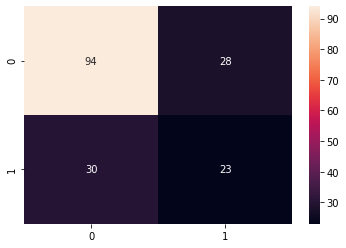

In [56]:
from sklearn.metrics import classification_report,confusion_matrix
print('Accuracy: \n', accuracy_score(ytest,ypa))
print(confusion_matrix(ytest,ypa))
print(classification_report(ytest,ypa))
sns.heatmap(confusion_matrix(ytest,ypa),annot=True,fmt="d")

## **Logical**


In [66]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
pipe=Pipeline([('rescale',StandardScaler()),('classifier',LogisticRegression())])

In [67]:
pipe.fit(xtrain,ytrain)

Pipeline(memory=None,
         steps=[('rescale',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('classifier',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='auto', n_jobs=None,
                                    penalty='l2', random_state=None,
                                    solver='lbfgs', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)

In [68]:
yplog=pipe.predict(xtest)
yplog

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int64)

In [69]:
from sklearn.metrics import accuracy_score
log=accuracy_score(ytest,yplog)
log

0.6857142857142857

In [0]:
##Result

In [70]:
Accuracy={'logical':log,'ANN':ann,'Navie':nb,'SVC':svc,'Decision tree':Deci,'KNN':knn}

<BarContainer object of 6 artists>

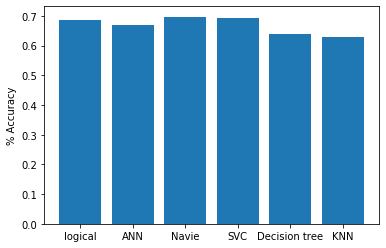

In [83]:
plt.ylabel('% Accuracy')
plt.bar(Accuracy.keys(),Accuracy.values())

In [75]:
Accuracy.values()

dict_values([0.6857142857142857, 0.6685714285714286, 0.6971428571428572, 0.6914285714285714, 0.64, 0.6285714285714286])

In [79]:
max(Accuracy,key=Accuracy.get)

'Navie'